# INM707 Coursework Task 2
### Aaron Mir (Student Number: 160001207)

## Q-learning algorithm implemented for the Stronghold environment to find the best policy

***
## Stronghold

The robot agent is preparing for an upcoming mission in which they are to infiltrate an enemy stronghold to gather intelligence on a potential coup d'état. The enemy land is in the form of an NxN grid with each grid containing one stronghold of size N x N/2 (starting on either side of the middle column (randomly decided)) and a wide river surrounding the entire enemy land. The entire land is very misty, therefore the robot may not step where it is supposed to. Each move has a transition probability associated with it (0.7 to move to the chosen state or 0.3 to move to one of the other sides) (stochasticity). The stronghold has as many entrances from the mainland as (1/4)N and contains (1/5)N dangerous enemy combatants (at random positions) within the stronghold that move around randomly per step (stochasticity).  The amount of shore that has traps on it is (1/4)N x rows of shore. The column immediately beside the stronghold is normal land to prevent entrance blocking. The goal of the agent is to infiltrate the stronghold and gather the intelligence without being killed by enemy combatants or booby traps as fast as possible.

This is a type of gridworld environment. The size (number of states) can be controlled by adjusting the grid dimensions.

The environment is defined as follows:

- The environment is a rectangular grid of states/cells. There are five different types of cells as indicated by the following cell labels: 

    - _ labels cells that are safe to step on i.e. normal land [0]

    - X labels the cells that are walls i.e. river or wall and if the agent enters a wall cell, there is a penalty of -1 [1]
    
    - A labels the cell the agent is on, starts on a random cell on the shore [2]
    
    - T labels booby-trap cells and if the agent enters a booby-trap cell there is a pentalty of -1000 and the episode ends [3]

    - E labels enemy cells and if the agent enters an enemy cell there is a pentalty of -1000 and the episode ends [4]

    - I labels the intelligence cell and when reached gives a reward of 1000 and the episode ends [5]

- There are four possible actions (Up, Down, Left, Right). 

- The transition function moves the agent in the expected direction with 0.7 probability, and there is a 0.3 probability of transitioning to one of the sides.

- There is a reward of -1 for each action taken by the agent, which is intended to encourage the agent to reach the goal as fast as possible. If the agent runs out of time, the episode ends. 

- Episodes end whenever the agent falls in a booby-trap, gets killed by an enemy, reaches the goal/intelligence or runs out of time. The end-of-episode is modelled by transitioning to a zero-reward terminal state (all actions lead to that state). 

State of the agent: Governed by the state number of the cell it is on.

States of the environment: Governed by the state number of the agent and the state number of moving enemies.

Number of states of the environment is given by the size of the grid and the size of the stronghold in which enemies can move. e.g. for a 10x10 grid with a stronghold size of 6x3 and 6 enemies, the number of states is 100 - 6x3-1 +  (6x3-1 (because of starting state)/6)  - 1 (because of the intelligence in the stronghold)

Rewards/Penalties: +1000 for getting intelligence, -1000 for getting hurt by a combatant or booby trap, -1 for moving into a wall or water, -1 per transition because of fuel constraints

***

Q-learning works by building a table of action and states and learning the 'q-values' at each location. The values in the table are randomly (or zero) initialized at first and are learnt through the bellman equation.
The bellman equation is 

<img src="Bellman Eq.png" alt="Bellman" width="1000"/>

The learning starts by first focussing more on the exploration and then on the exploitation. This is because in the start we don't know which is the optimal step and hence we must try to explore entire space and later do exploitation. Exploration simply means randomly selecting an action and exploitation means selecting the action with highest reward. This transition can be easily modelled using exponentially or linearly scheduling the exploration probability.

In [15]:
from stronghold.stronghold import Stronghold
import numpy as np
import matplotlib.pyplot as plt

Checklist:

    1. Build a Q-table

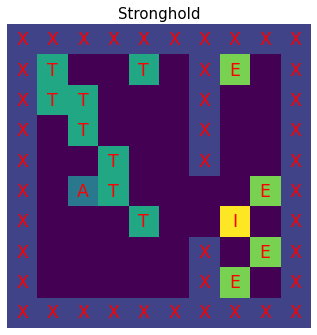

In [18]:
stronghold = Stronghold(10)
stronghold.reset()
stronghold.render()

In [ ]:
# A class to represent policies the agent can take and evaluation 
class Policies():
    def __init__(self, epsilon, lr, episodes, env_size, test_len = 100, action_space = 4, beta = 0.999, testing = True):
        self.epsilon = epsilon
        self.lr = lr
        self.test_interval = test_interval
        self.beta = beta
        self.action_space = action_space
        self.state_space = env_size * env_size + 1
        self.q_table = np.zeros((self.state_space, self.action_space))
        self.testing = testing

    def explore_exploit_policy(self, current_state):
        if np.random.uniform(0, 1) > self.epsilon:
            return self.greedy_policy(current_state)
        else:
            return np.random.randint(0, self.action_space - 1)

    def greedy_policy(self, current_state):
        return np.argmax(self.q_table[curr_state,:])

    def learn(self):
        pass 

    def evaluate_policy(self, policy, trials = 100):
        total_evaluation_reward = 0
        for i in range(trials):
            stronghold.reset()
            steps = 0 
            done = False
            state, reward, done, info = stronghold.step(policy)
            total_evaluation_reward += (self.beta ** steps) * reward
            trial_reward = 0
            steps += 1
            while not done:
                state, reward, done, info = stronghold.step(policy)
                trial_reward += (self.beta ** steps) * reward
                total_evaluation_reward += (self.beta ** steps) * reward
                steps += 1
                if view == True:
                    print("state", state)
                    env.render()
                    time.sleep(0.5)
                    clear_output(wait=True)
            print("Total reward for trial = ", trial_reward)
        return total_evaluation_reward / trials


In [ ]:
class Agent(Policies):
    def __init__(self, epsilon, lr, episodes, env_size, test_len = 100, action_space = 4, beta = 0.999, testing = True):
        super().__init__(epsilon, lr, episodes, env_size, test_len = test_len, action_space = action_space, beta = beta, testing = testing)
        self.step_max = 100
    
    def Qlearn(self):
        for i in range(self.test_interval):
            current_state = stronghold.reset()
            for j in range(self.step_max):
                choice_action = self.explore_exploit_policy(current_state)
                state, reward, done, info = stronghold.step(choice_action)
                new_choice =  self.greedy_policy(state)

                self.q_table[current_state, choice_action] = self.q_table[current_state, choice_action] + self.lr * \
                    (reward + self.beta *  self.q_table[state, new_choice] - self.q_table[current_state, choice_action])

                current_state = new_state
                if done == True:
                    break


In [ ]:
stronghold.reset()
epsilon = 0.3
lr = 0.001
episodes = 5000
testing = False
# do q learning